# CS5785 Assignment 1

Part I. The Housing Prices

---

## Preparation

In [124]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# PATH variables
DATA_PATH = "./data/Part_I/"
IMG_PATH = "./img/Part_I"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

## Data Ingestion

In [126]:
# Load the training and test data
def load_data_from_csv(filename):
    """
    Load the data to a Pandas dataframe from a file
    
    Args:
        filename: string containing the path to the dataset
        
    Return:
        df: a Pandas dataframe containing the loaded data
    """
    df = pd.read_csv(
        os.path.join(DATA_PATH, filename),
        index_col=0
    )
    
    return df

df = load_data_from_csv("train.csv")
print(f"Shape of the training data: {df.shape}")
df_test = load_data_from_csv("test.csv")
print(f"Shape of the test data: {df_test.shape}")

df.head()

Shape of the training data: (1460, 80)
Shape of the test data: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
# Get the descriptive statistics of numerical and categorical features
column_types = df.dtypes    # Get the data types of all columns

numerical_fea = column_types[column_types != 'object'].index.tolist()
categorical_fea = column_types[column_types == 'object'].index.tolist()

print(f"> Numerical features: ({len(numerical_fea)})")
print(numerical_fea)
print()

print(f"> Categorical features: ({len(categorical_fea)})")
print(categorical_fea)

> Numerical features: (37)
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

> Categorical features: (43)
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',

In [128]:
df[numerical_fea].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [129]:
df[categorical_fea].describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [131]:
print(categorical_fea)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [132]:
numerical_features = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageArea",
    "PoolArea",
    "YrSold",
    "SalePrice"
]

categorical_cols = [
    "MSZoning",
    "Utilities",
    "LandSlope",
    "Neighborhood",
    "BldgType",
    "HouseStyle",
    "ExterQual",   # -> numerical
    "ExterCond",   # -> numerical
    "BsmtQual",    # -> numerical
    "BsmtCond",    # -> numerical
    "HeatingQC",   # -> numerical
    "CentralAir",  # -> 0, 1
    "KitchenQual", 
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "MiscFeature",
    "SaleType",
]

print("numerical_features: ", len(numerical_features))
print("categorical_cols: ", len(categorical_cols))
print("total: ", len(numerical_features) + len(categorical_cols))

numerical_features:  21
categorical_cols:  19
total:  40


In [ ]:
# Keep a copy of the original data and drop the unneeded features
df_ori = df.copy()
df = df[numerical_features + categorical_cols]

## Baseline Model

For the baseline model,

1. Drop the categorical features with over 30% missing values.
2. Fill the other categorical features with missing values with the mode of the feature.
3. Fill the numerical features with missing values with the mean of the feature.
4. Perform one-hot encoding on the all the remaining categorical features.
5. Perform min-max scaling on all the numerical features.
6. Build a linear regression model with the processed data.
7. Train the model with Ordinary Least Squares (OLS) method.

### 1. Handling missing value

For categorical features with over 30% NA values, drop the whole columns.

In [109]:
# Determine which features to be dropped based on the percentage of NA values
def get_features_to_drop(df_train, feature_list, threshold):
    """
    Determine which features to be dropped based on the percentage of NA values
    in the training data

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to be checked
        threshold: a float number indicating the threshold of NA percentage
    """
    null_counts = df_train.loc[:, feature_list].isna().sum() / len(df_train)
    return list(null_counts[null_counts > threshold].index)

# Drop the features with NA values more than 30%
feature_to_drop = get_features_to_drop(df, categorical_fea, threshold=0.3)

df = df.drop(feature_to_drop, axis=1)
df_test = df_test.drop(feature_to_drop, axis=1)

categorical_fea = list(set(categorical_fea) - set(feature_to_drop))

print(f"Shape of the training data: {df.shape}")
print(f"Shape of the test data: {df_test.shape}")

Shape of the training data: (1460, 74)
Shape of the test data: (1459, 73)


For other categorical features with NA values, fill them with the mode of the feature values

In [ ]:
# Create a dict to store the mode/mean/median of each feature in the training dataset
def create_fea_mesature_dict(df_train, feature_list, measure="mode"):
    """
    Create a dict to map the mode/mean/median of each feature in the training dataset,
    which can be used to transform the test dataset

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to measure on
        measure: mode/mean/median
    """
    measure_dict = dict()
    for col in feature_list:
        if measure == "mode":
            measure_dict[col] = df_train[col].mode()[0]
        elif measure == "mean":
            measure_dict[col] = df_train[col].mean()
        elif measure == "median":
            measure_dict[col] = df_train[col].median()
        else:
            raise ValueError("measure should be mode/mean/median")
    return measure_dict


In [110]:
# Create a dict to store the mode of each categorical feature in the training dataset
def create_mode_dict(df, categorical_fea):
    """
    Create a dict to store the mode of each categorical feature in the training dataset

    Args:
        df: a Pandas dataframe containing the traning data
        categorical_fea: a list containing the names of categorical features

    Return:
        mode_dict: a dict containing the mode of each categorical feature
    """
    mode_dict = dict()
    for col in categorical_fea:
            mode_dict[col] = df[col].mode()[0]
    return mode_dict

mode_dict = create_mode_dict(df, categorical_fea)

# Fill the NA values of categorical features with the mode
def fill_na_with_mode(df, mode_dict):
    """
    Fill the NA values of categorical features with the mode
    
    Args:
        df: a Pandas dataframe containing the data
        mode_dict: a dict containing the mode of each categorical feature
        
    Return:
        df: a Pandas dataframe containing the data after filling the NA values
    """
    
    for col in mode_dict.keys():
        df[col].fillna(mode_dict[col], inplace=True)
    return df

df = fill_na_with_mode(df, mode_dict)
df_test = fill_na_with_mode(df_test, mode_dict)

# Check if there are still NA values in the categorical features
print("Number of NA values in the training data's categorical features:")
print(df[categorical_fea].isna().sum().sum())
print()

# Print the size of each dataset
print(f"Shape of the training data: {df.shape}")
print(f"Shape of the test data: {df_test.shape}")


Number of NA values in the training data's categorical features:
0

Shape of the training data: (1460, 74)
Shape of the test data: (1459, 73)


For numerical features, fill them with the mean of the feature values

In [111]:
# Create a dict to store the mean of each numerical feature in the training dataset
def create_mean_dict(df, numerical_fea):
    """
    Create a dict to store the mean of each numerical feature in the training dataset

    Args:
        df: a Pandas dataframe containing the traning data
        numerical_fea: a list containing the names of numerical features

    Return:
        mean_dict: a dict containing the mean of each numerical feature
    """
    mean_dict = dict()
    for col in numerical_fea:
        mean_dict[col] = df[col].mean()
    return mean_dict

mean_dict = create_mean_dict(df, numerical_fea)

# Fill the NA values of numerical features with the mean
def fill_na_with_mean(df, mean_dict):
    """
    Fill the NA values of numerical features with the mean
    
    Args:
        df: a Pandas dataframe containing the data
        mean_dict: a dict containing the mean of each numerical feature
        
    Return:
        df: a Pandas dataframe containing the data after filling the NA values
    """
    for col in mean_dict.keys():
        try:
            df[col].fillna(mean_dict[col], inplace=True)
        except KeyError:
            pass
    return df

df = fill_na_with_mean(df, mean_dict)
df_test = fill_na_with_mean(df_test, mean_dict)

# Check if there are still NA values in the numerical features
print("Number of NA values in the training data's numerical features:")
print(df[numerical_fea].isna().sum().sum())
print()

# Print the size of each dataset

print(f"Shape of the training data: {df.shape}")
print(f"Shape of the test data: {df_test.shape}")

Number of NA values in the training data's numerical features:
0

Shape of the training data: (1460, 74)
Shape of the test data: (1459, 73)


### 2. Encoding categorical features

In [114]:
# Perform one-hot encoding to all categorical features
df = pd.get_dummies(df, columns=categorical_fea)
df_test = pd.get_dummies(df_test, columns=categorical_fea)

# Check the size of each dataset
print(f"Shape of the training data: {df.shape}")
print(f"Shape of the test data: {df_test.shape}")

Shape of the training data: (1460, 231)
Shape of the test data: (1459, 225)


### 3. Scaling numerical features

In [ ]:
# Perform min-max scaling on all the numerical features based on the training data
df = (df - df.min()) / (df.max() - df.min())


Now, we can implement a baseline model with the encoded features.

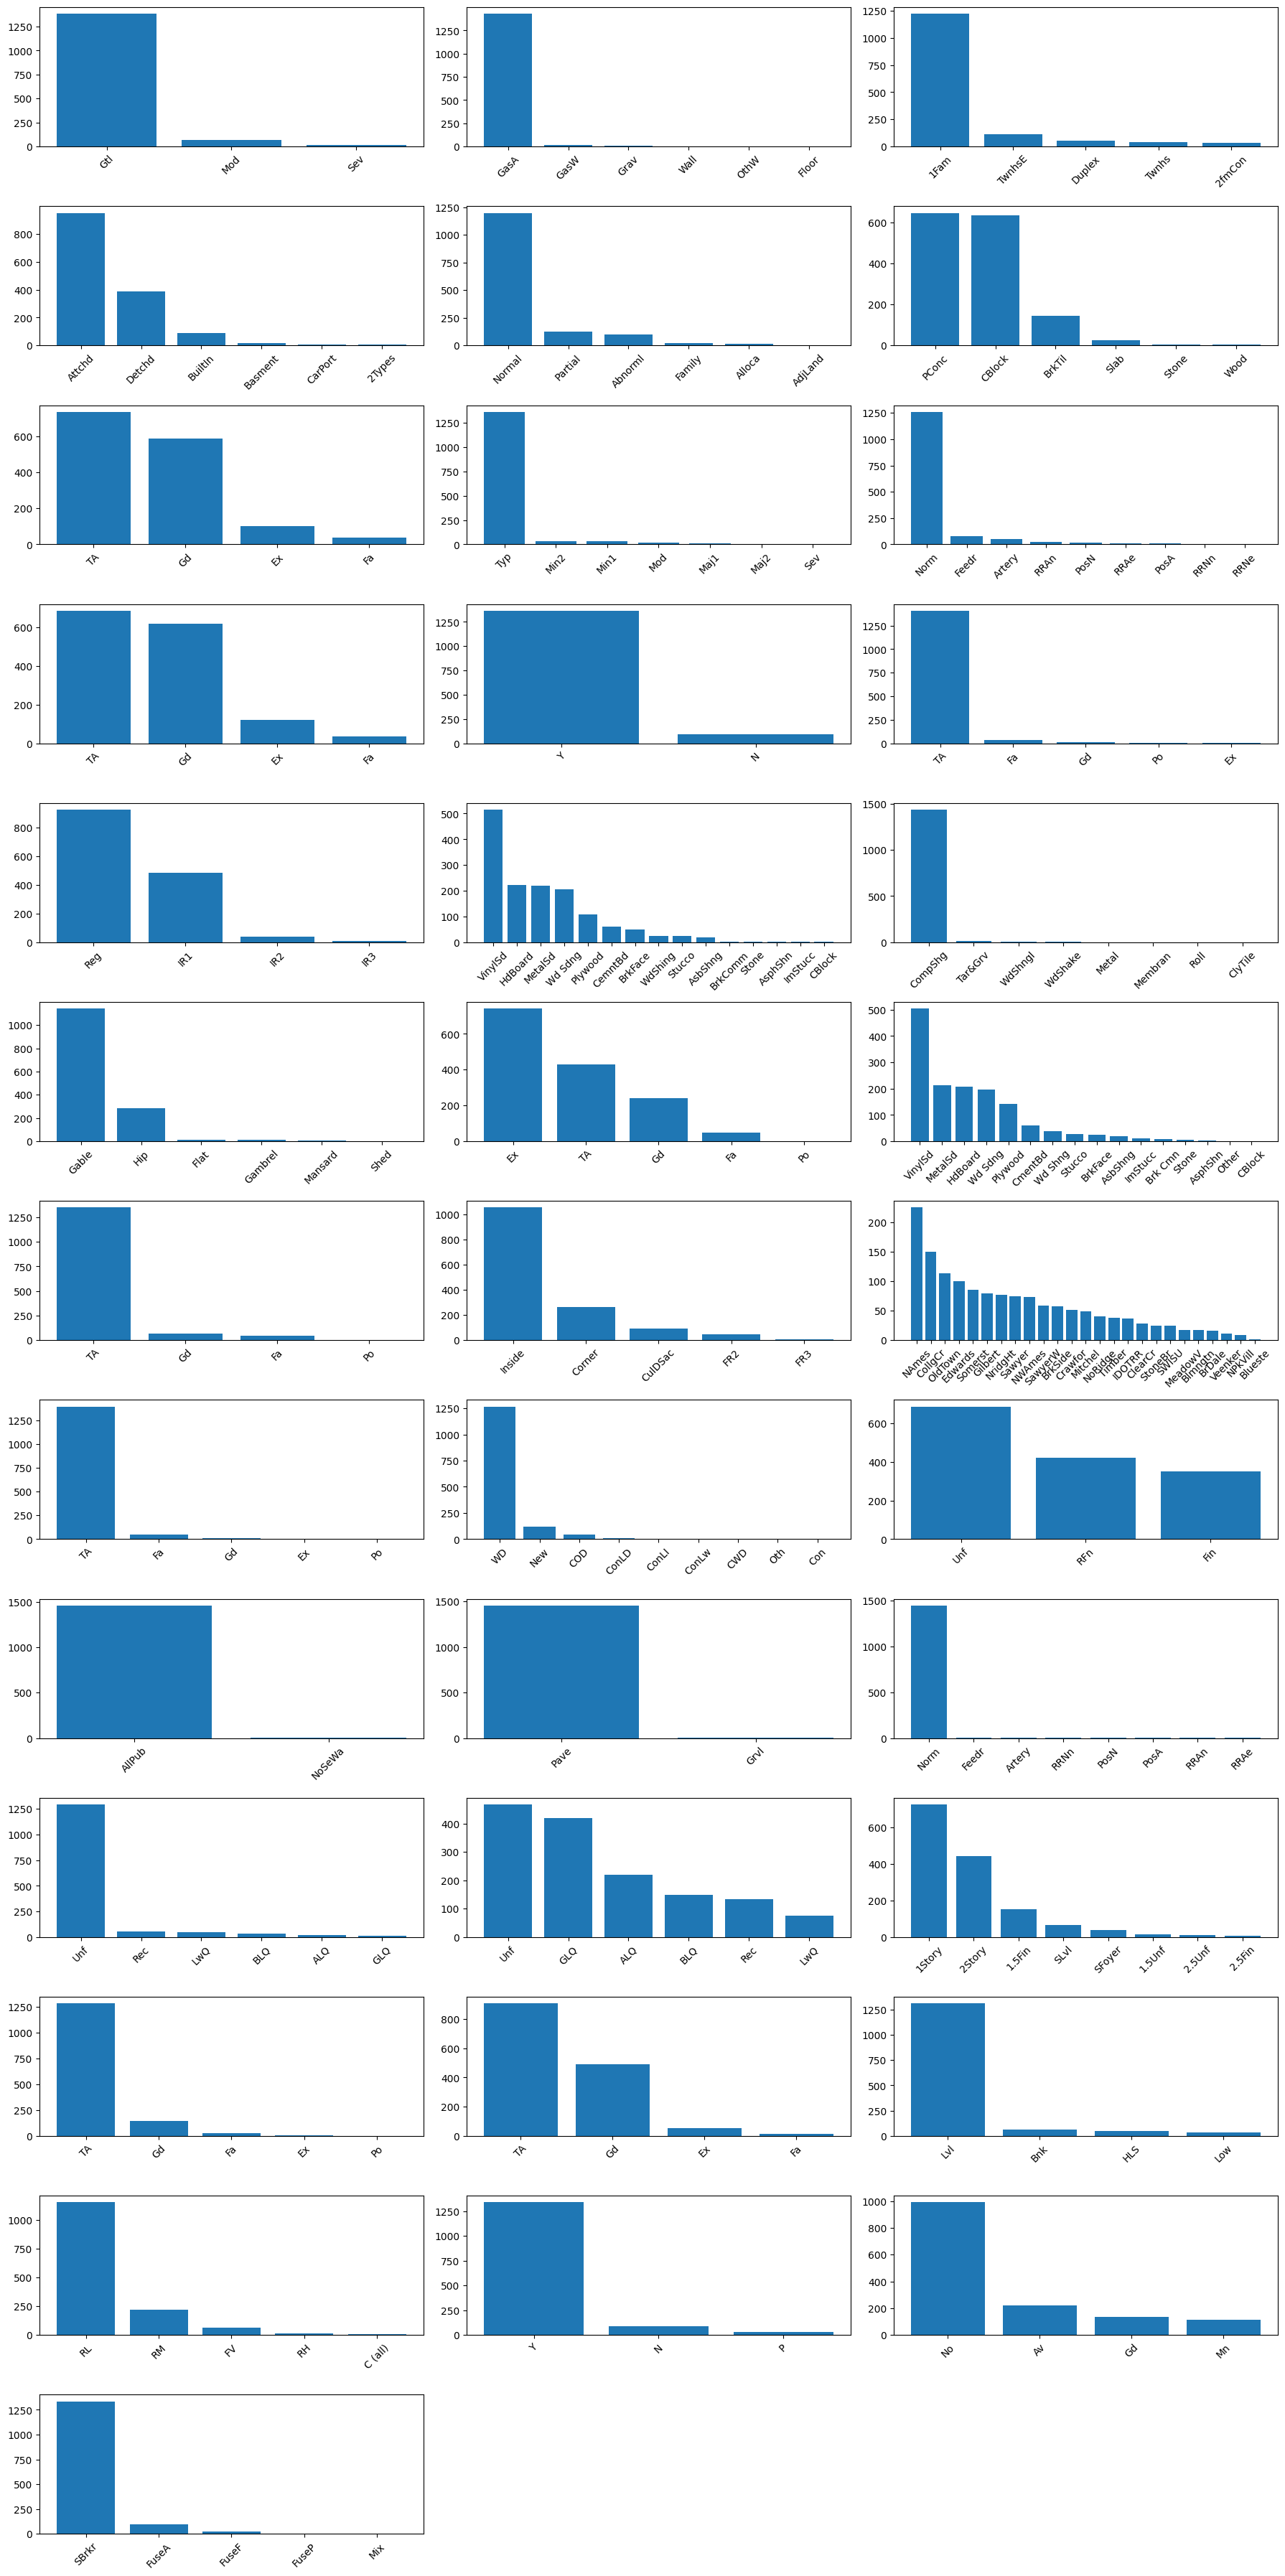

In [112]:
# Examine the distribution of the each categorical feature in the training dataset
def plot_categorical_features(df, categorical_fea, img_path):
    """
    Examine the distribution of the each categorical feature in the training dataset

    Args:
        df: a Pandas dataframe containing the data
        categorical_fea: a list containing the names of categorical features
        img_path: a string containing the path to save the plots
    """
    plt.figure(figsize=(18, 36))
    for i, col in enumerate(categorical_fea):
        plt.subplot(13, 3, i + 1)
        counts = df[col].value_counts()
        plt.bar(counts.index, counts.values)
        plt.xticks(rotation=45)
    # Prevent overlapping between subplots
    plt.tight_layout()

    plt.savefig(os.path.join(img_path, "categorical_features.png"))
    plt.show()


plot_categorical_features(df, categorical_fea, IMG_PATH)

In [ ]:
# There are several categorical features with ordinal values. For these features, we can simply encode them with the corresponding integer values.
def encode_ordinal_features(df, ordinal_fea):
    """
    Encode the ordinal features with the corresponding integer values

    Args:
        df: a Pandas dataframe containing the data
        ordinal_fea: a list containing the names of ordinal features

    Return:
        df: a Pandas dataframe containing the data after encoding
    """
    for col in ordinal_fea:
        df[col] = df[col].map({
            "Ex": 5,
            "Gd": 4,
            "TA": 3,
            "Fa": 2,
            "Po": 1,
            "NA": 0
        })
    return df

There are several categorical features with ordinal values. For these features, we can simply encode them with the corresponding integer values.

In [113]:
# Drop the categorical feature if the largest category is more than 95% of the total
def get_skewed_features_to_drop(df, categorical_fea, threshold):
    """
    Determine which categorical features to be dropped based on the percentage of the largest category

    Args:
        df: a Pandas dataframe containing the data
        categorical_fea: a list containing the names of categorical features
        threshold: a float number indicating the threshold of the largest category percentage
    """
    skewed_features = []
    for col in categorical_fea:
        counts = df[col].value_counts()
        largest_cat_pct = counts.values[0] / len(df)
        if largest_cat_pct > threshold:
            skewed_features.append(col)
    return skewed_features


skewed_features = get_skewed_features_to_drop(df, categorical_fea, threshold=0.95)
print(f"Number of skewed features: {len(skewed_features)}")

# Drop the skewed features
df = df.drop(skewed_features, axis=1)
df_test = df_test.drop(skewed_features, axis=1)

categorical_fea = list(set(categorical_fea) - set(skewed_features))

print(f"Shape of the training data: {df.shape}")
print(f"Shape of the test data: {df_test.shape}")

Number of skewed features: 7
Shape of the training data: (1460, 67)
Shape of the test data: (1459, 66)


## Model Training

## Model Validation